In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [5]:
# Loading the dataset
df = pd.read_csv("PV_Data.csv")

# Drop rows with missing values
df = df.dropna()

# Descriptive statistics
length_col = len(df.columns)
length_ob = len(df)
print("Number of attributes:", length_col, "Number of observations:", length_ob)

df.describe()

Number of attributes: 7 Number of observations: 1373798


,Voltage - String 1,Voltage - String 2,Current - String 1,Current - String 2,Irradiance,PV Module Temperature,Fault Label
count,1.373798e+06,1.373798e+06,1.373798e+06,1.373798e+06,1.373798e+06,1.373798e+06,1.373798e+06
mean,1.351183e+02,1.347199e+02,2.276919e+00,2.000344e+00,2.576111e+02,2.277277e+01,5.813846e-01
std,1.363339e+02,1.367309e+02,3.190345e+00,3.038147e+00,3.531219e+02,1.423148e+01,1.389633e+00
min,3.799000e-01,3.164000e-01,4.180000e-02,4.600000e-03,-3.810000e-02,-1.654300e+00,0.000000e+00
25%,8.907000e-01,8.840000e-01,6.860000e-02,1.270000e-02,1.290100e+00,1.213270e+01,0.000000e+00
50%,3.777625e+01,3.983745e+01,1.136000e-01,4.410000e-02,1.736400e+00,1.849045e+01,0.000000e+00
75%,2.730600e+02,2.719860e+02,5.102100e+00,4.140400e+00,5.907180e+02,3.415595e+01,0.000000e+00
max,3.639740e+02,3.687490e+02,9.654900e+00,9.498700e+00,1.085920e+03,6.082150e+01,4.000000e+00


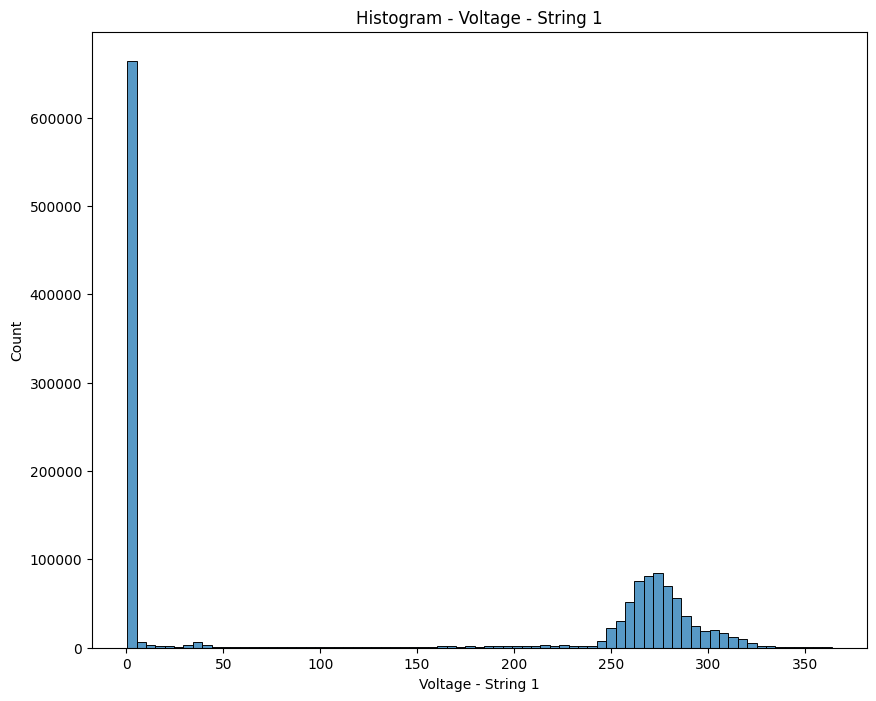

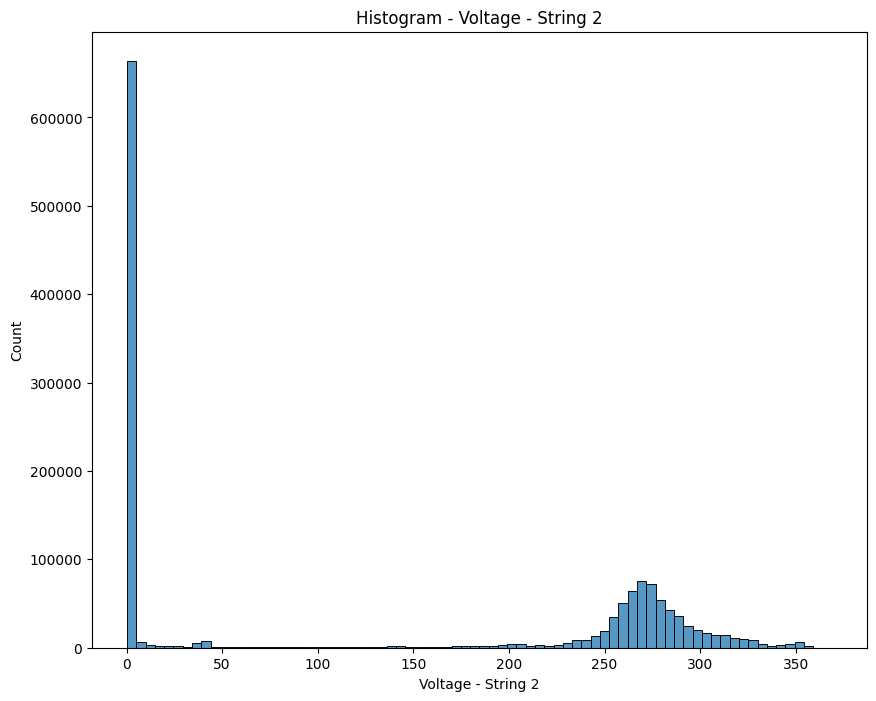

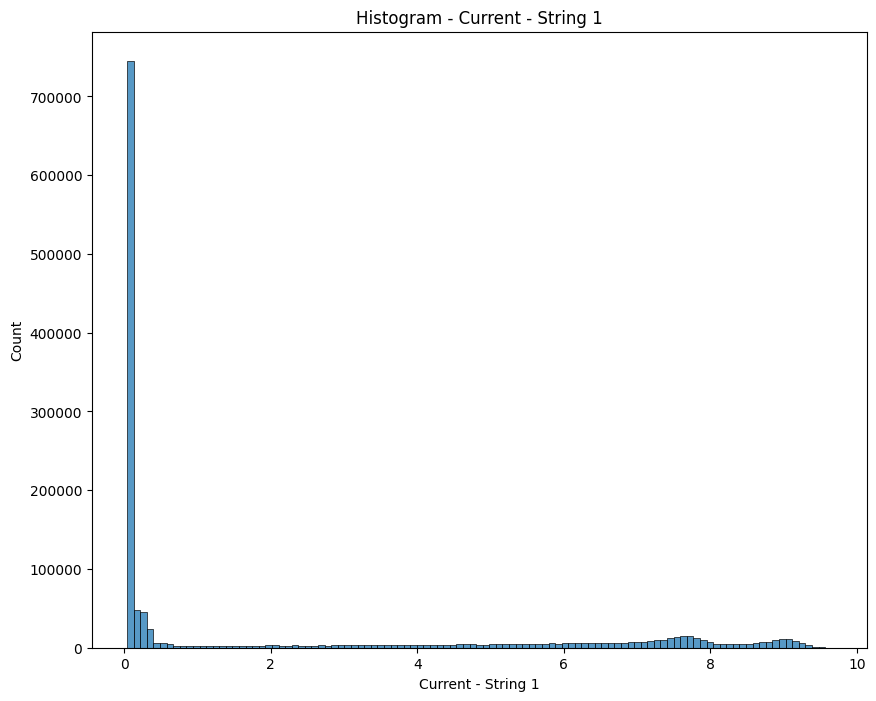

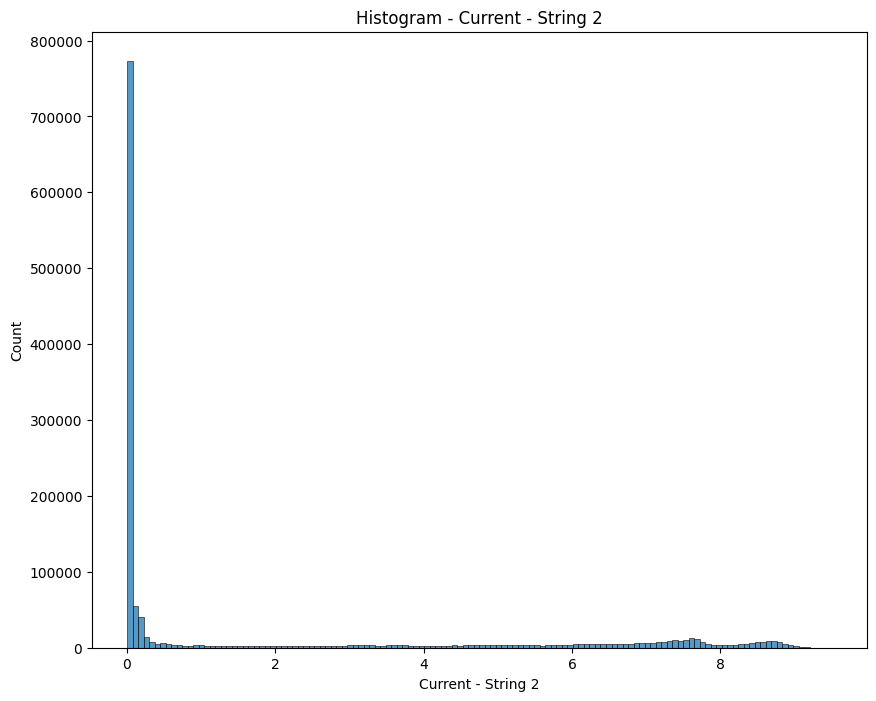

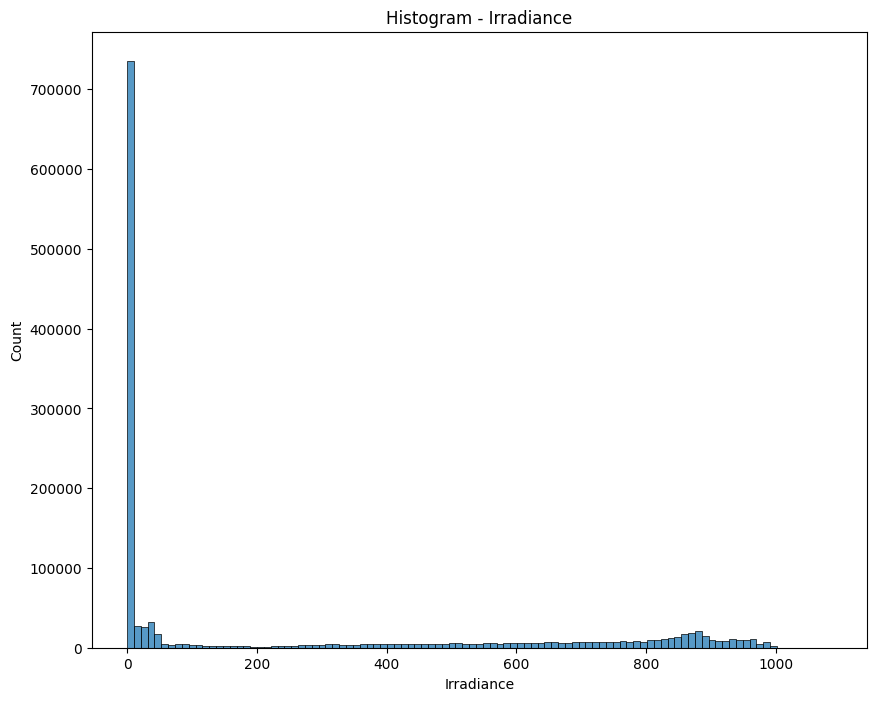

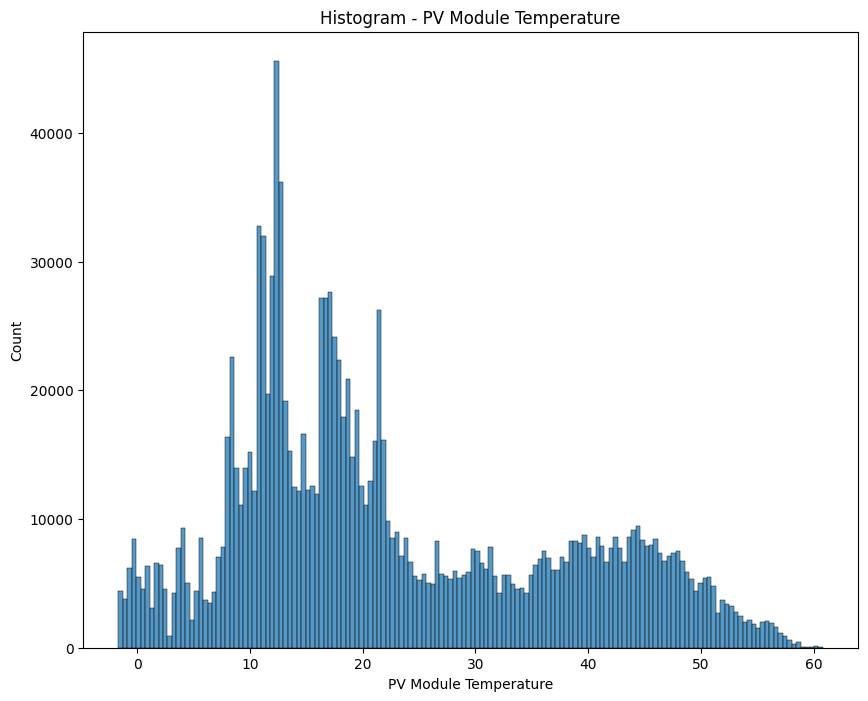

In [6]:
# Graphic Summaries

#histograms
plt.figure(figsize=(10, 8))
sns.histplot(df['Voltage - String 1'])
plt.title('Histogram - Voltage - String 1')
plt.show()

plt.figure(figsize=(10, 8))
sns.histplot(df['Voltage - String 2'])
plt.title('Histogram - Voltage - String 2')
plt.show()

plt.figure(figsize=(10, 8))
sns.histplot(df['Current - String 1'])
plt.title('Histogram - Current - String 1')
plt.show()

plt.figure(figsize=(10, 8))
sns.histplot(df['Current - String 2'])
plt.title('Histogram - Current - String 2')
plt.show()

plt.figure(figsize=(10, 8))
sns.histplot(df['Irradiance'])
plt.title('Histogram - Irradiance')
plt.show()

plt.figure(figsize=(10, 8))
sns.histplot(df['PV Module Temperature'])
plt.title('Histogram - PV Module Temperature')
plt.show()


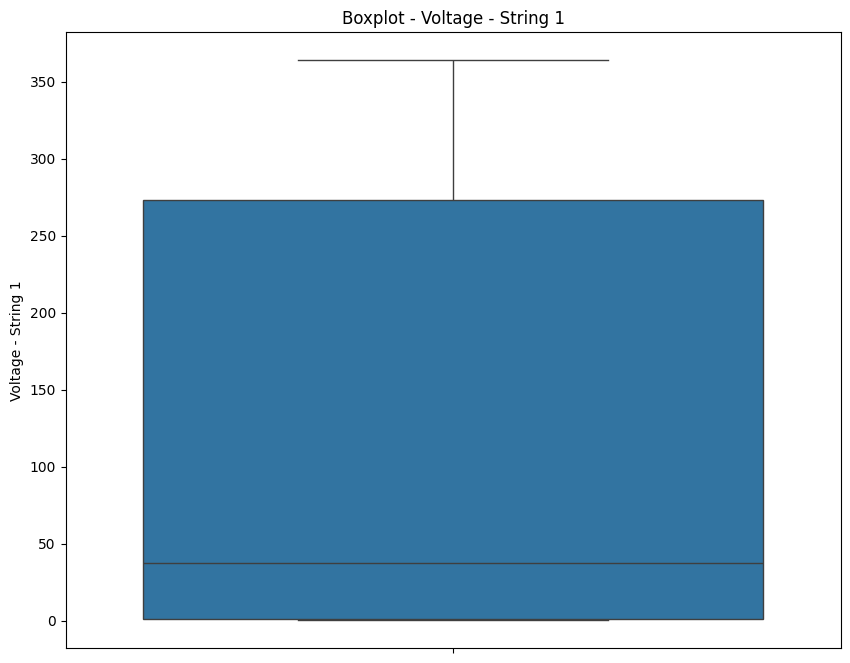

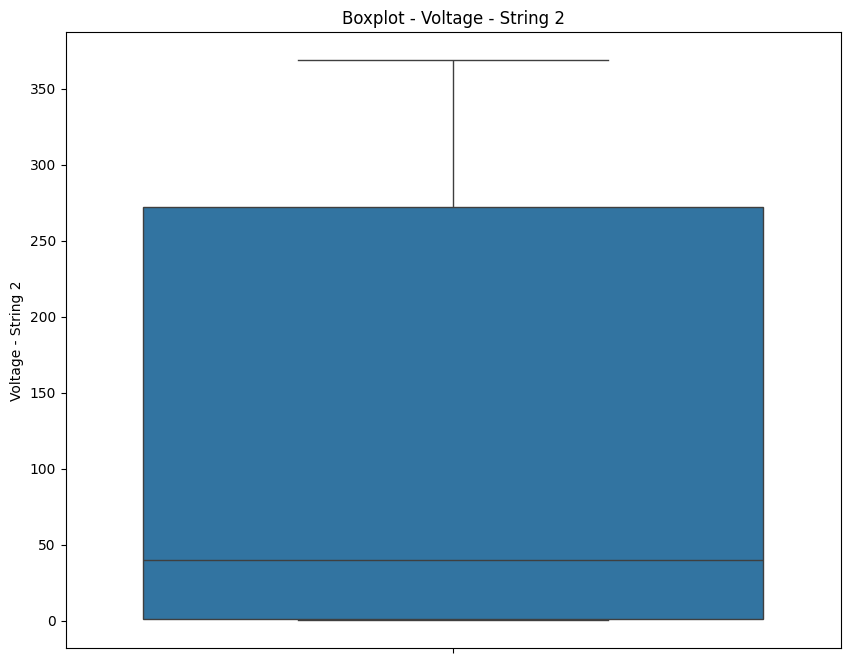

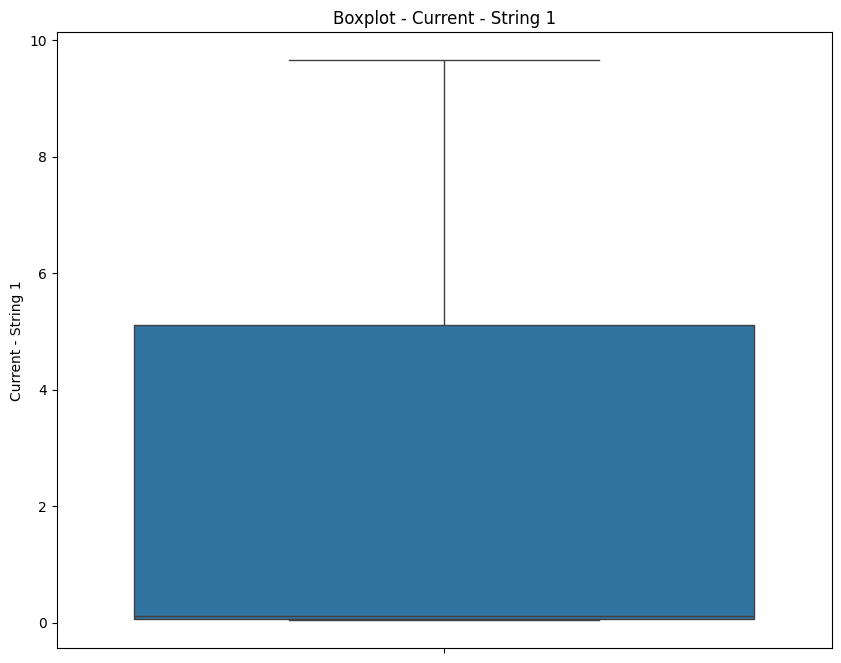

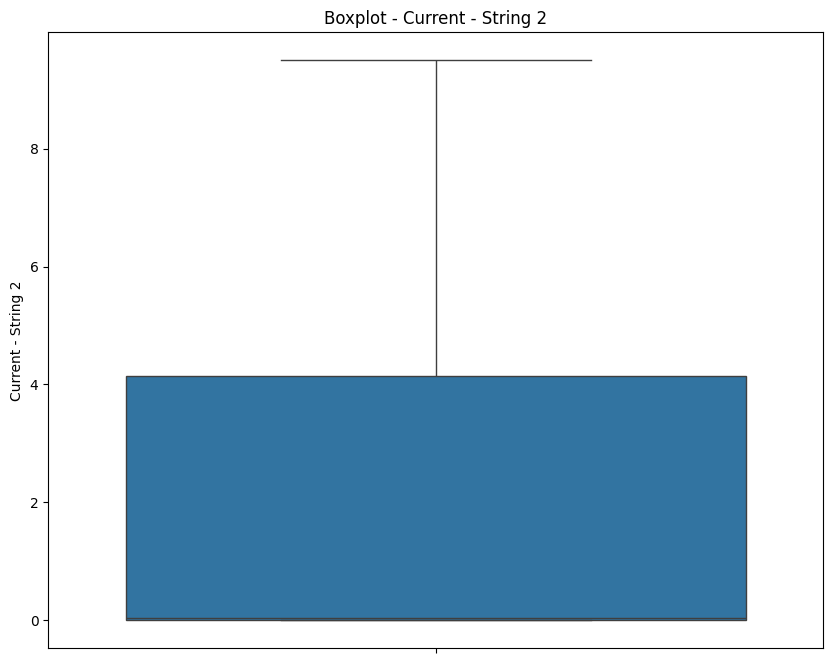

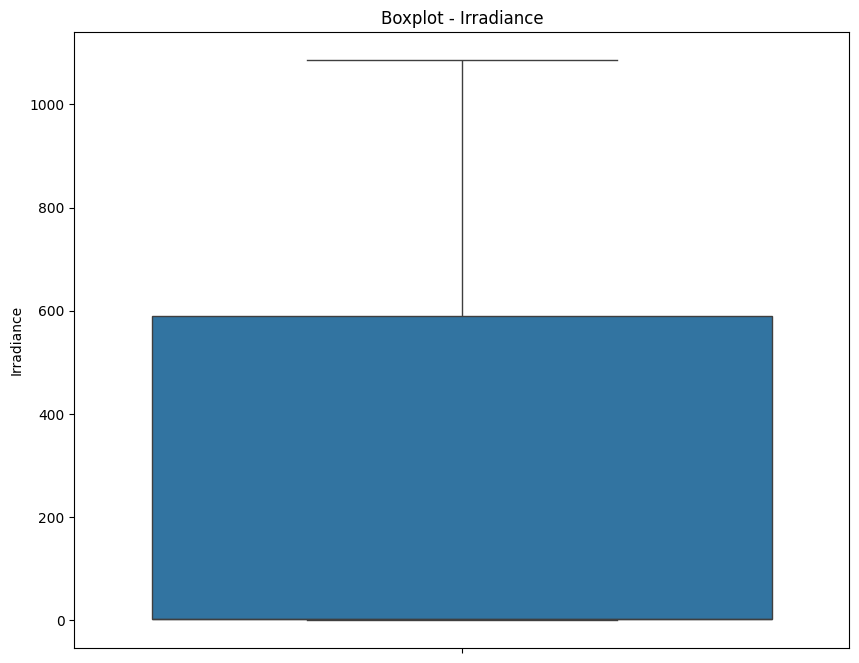

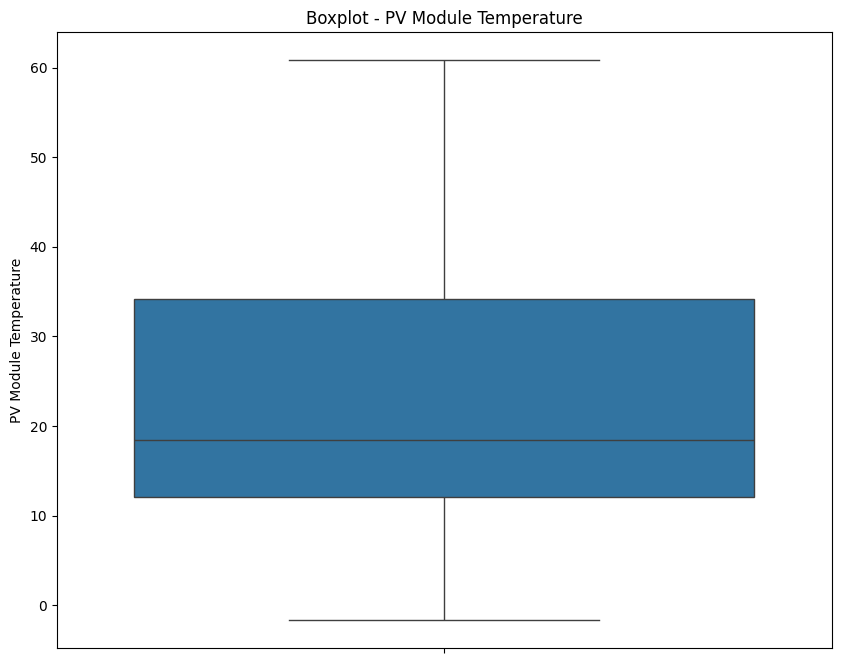

In [7]:
#boxplots
plt.figure(figsize=(10, 8))
sns.boxplot(df['Voltage - String 1'])
plt.title('Boxplot - Voltage - String 1')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(df['Voltage - String 2'])
plt.title('Boxplot - Voltage - String 2')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(df['Current - String 1'])
plt.title('Boxplot - Current - String 1')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(df['Current - String 2'])
plt.title('Boxplot - Current - String 2')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(df['Irradiance'])
plt.title('Boxplot - Irradiance')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(df['PV Module Temperature'])
plt.title('Boxplot - PV Module Temperature')
plt.show()



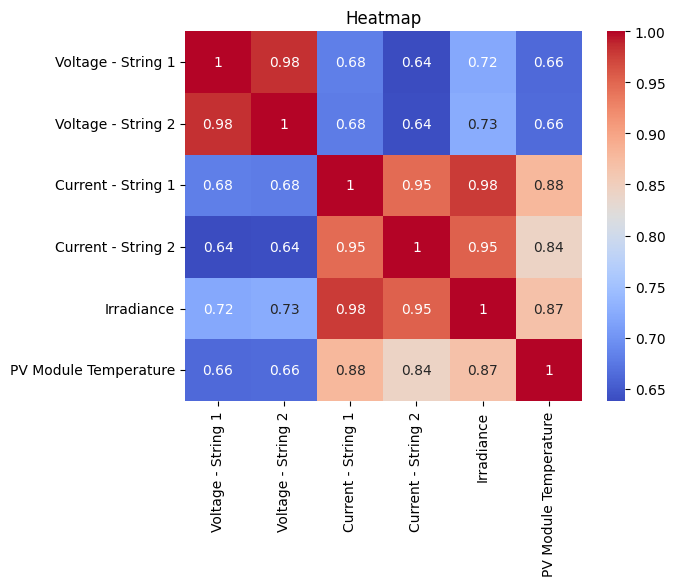

In [8]:

#Heatmap
feature_columns = df[df.columns[:6]]
sns.heatmap(feature_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

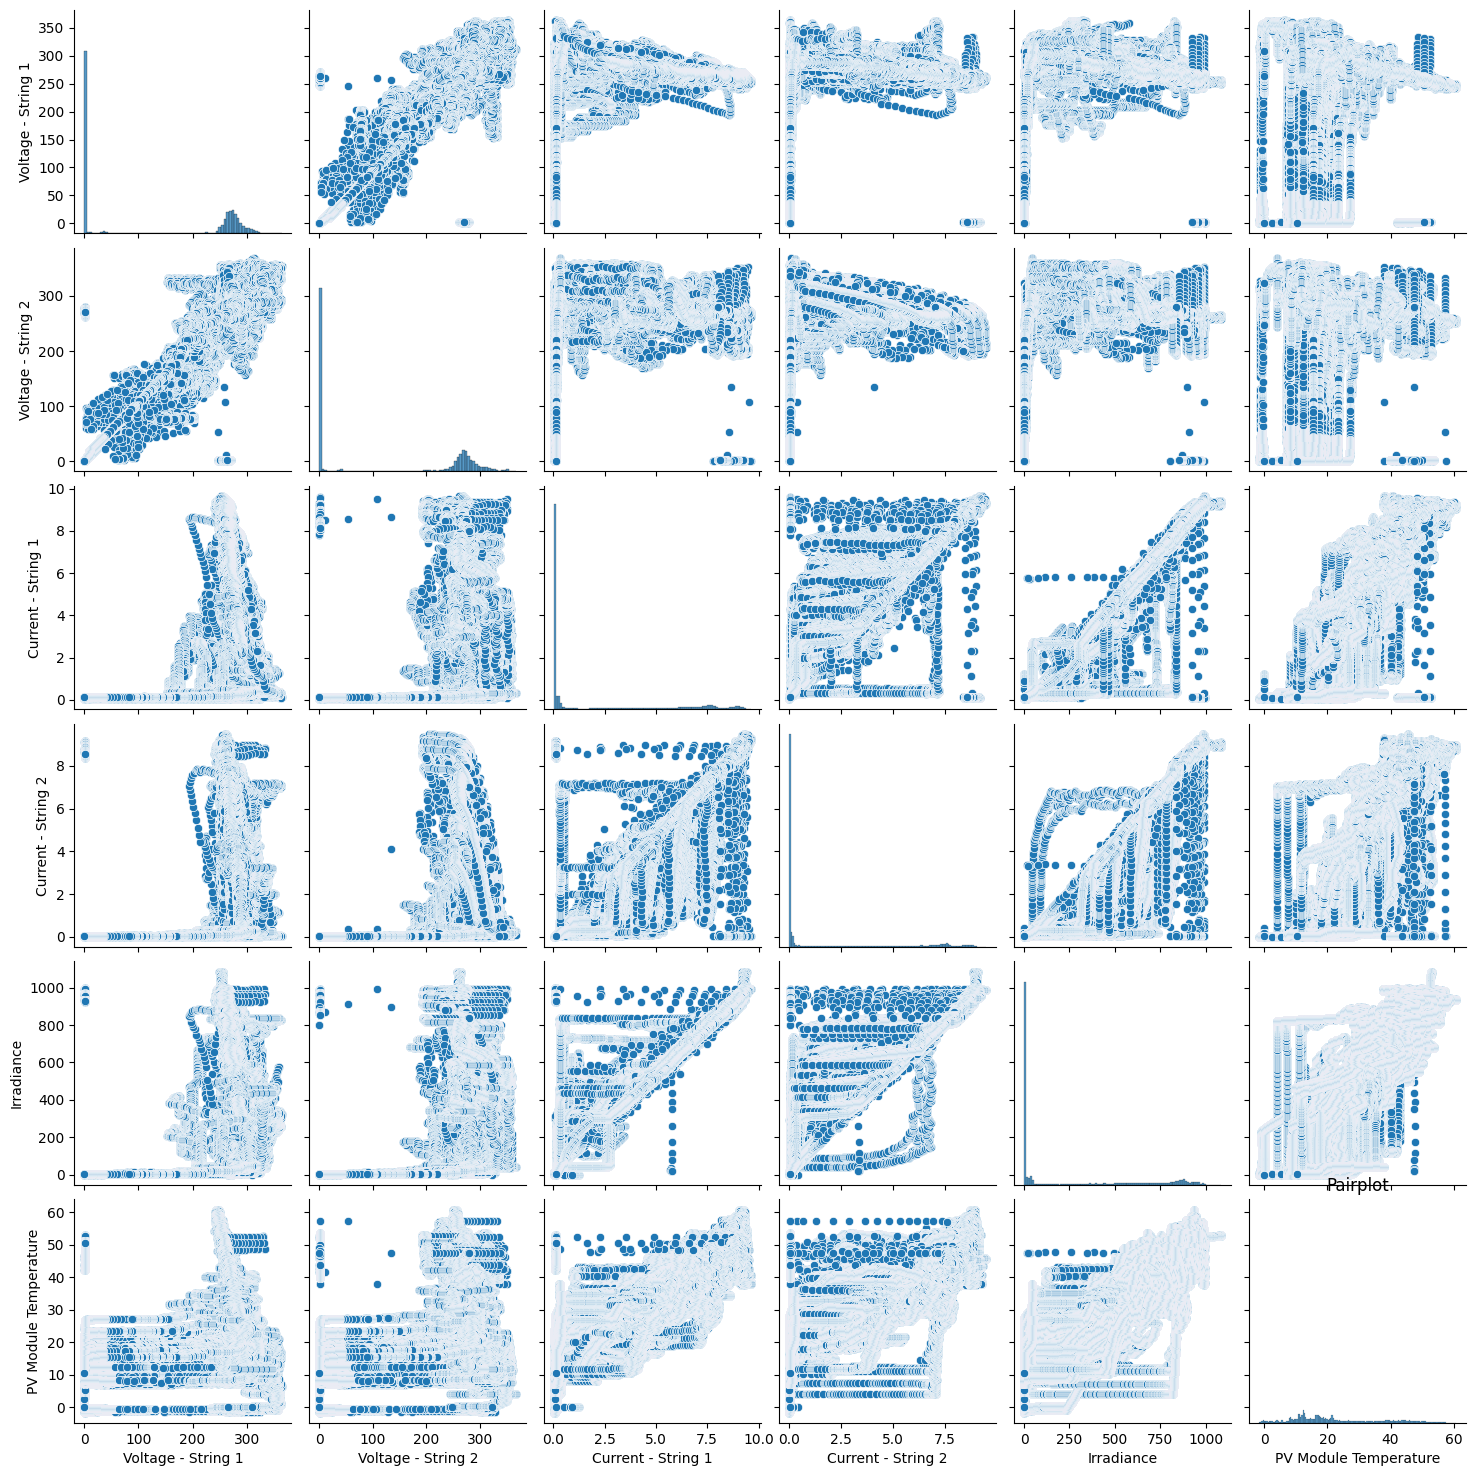

In [9]:
#Pairplot
sns.pairplot(feature_columns)
plt.title('Pairplot')
plt.show()

In [10]:
# Preprocess the data
data_numpy = df.to_numpy()
X = data_numpy[:, :6]
y = data_numpy[:, 6]

scaler = preprocessing.MinMaxScaler()
X_scaled_min_max = scaler.fit_transform(X)

scaler = preprocessing.StandardScaler()
X_scaled_standard_sc = scaler.fit_transform(X)

In [ ]:
# Model training and evaluation
classifiers = {
    'Decision Trees': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Naïve Bayes': GaussianNB(),
    'SVM (RBF)': SVC(kernel='rbf'),  # SVM with RBF kernel
    'SVM (Poly)': SVC(kernel='poly'),  # SVM with Polynomial kernel
    'Neural Networks': MLPClassifier()
}

for features in [X_scaled_min_max, X_scaled_standard_sc]:
    for initial_state in [1, 20, 40]:
        X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=initial_state, test_size=0.3)

        results = {'Classifier': [], 'Accuracy': []}

        for classifier_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            results['Classifier'].append(classifier_name)
            results['Accuracy'].append(accuracy)

        print('\nResults for Features ({features}) with Random State {initial_state}:\n')
        results_df = pd.DataFrame(results)
        print(results_df)



Results for Features ({features}) with Random State {initial_state}:

        Classifier  Accuracy
0   Decision Trees  0.998090
1             k-NN  0.998420
2      Naïve Bayes  0.768176
3        SVM (RBF)  0.990302
4       SVM (Poly)  0.991755
5  Neural Networks  0.995504
